##**Goal : 다음 분기에는 어떤 게임을 설계해야 할까?**
---
잘 팔리는, 즉 전 세계적으로 봤을 때, 출고량이 높은 게임을 출시해야 함.  
--> Then, 먼저 전처리를 통해 출고량의 합계를 내야 함.

*   **연도별 게임의 트렌드**  
    Year에 따른 Platform, Publisher, Genre의 변화를 확인.  
    Then, Platform 및 Publisher, Genre의 동향 확인 가능.  
    And Year 축소화 가능

*   **지역에 따른 Genre트렌드**  
    지역을 기준으로 Genre의 순위를 매겼을 때, 공통적으로 상위에 있는 Genre를 선별하는 것이 목표.  
    Then, Genre의 중요 순위 확인 가능

*   **출고량이 높은 게임에 대한 분석/시각화**  
    Year마다 평균치, 모수가 다르기 때문에 정규화를 통한 균일화 필요







### **Step 1. 데이터 전처리**

#### 1-1. 데이터 업로드

In [ ]:
#from google.colab import files
#myfile = files.upload()
import pandas as pd

df = pd.read_csv('vgames2.csv')
df = df.iloc[:, 1:]

# 데이터 타입 확인
print(df.dtypes)

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object


#### 1-2. 결측치 처리

In [ ]:
# 결측치 확인
print(df.isnull().sum(), '\n')

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64 



In [ ]:
# 결측치 처리
# 전체 데이터 16598개 중 총 결측치 데이터 357개로, 2.1%에 불과하기 때문에 무시할 수 있는 수준의 데이터 양이라 판단됨

# Year 결측치 처리
# 전체 데이터 16598개 중 결측치 271개로, 1.6%에 불과하기 때문에 무시할 수 있는 수준의 데이터 양이라 판단됨
df = df.dropna(subset=['Year'])

# Genre 결측치 처리
# 전체 데이터 16598 중 결측치 50개로, 0.3%에 불과하기 때문에 무시할 수 있는 수준의 데이터 양이라 판단됨
df = df.dropna(subset=['Genre'])

# Publisher 결측치 처리
# 전체 데이터 16598 중 결측치 58개로, 0.34%에 불과하기 때문에 무시할 수 있는 수준의 데이터 양이라 판단됨
df = df.dropna(subset=['Publisher'])

# 중복 데이터 처리
df = df.drop_duplicates()

#### 1-3. Year 데이터 처리

In [ ]:
# Year 데이터 처리
def year_f(x):
    if x < 50:
        return x + 2000
    elif x < 100:
        return x + 1900
    else:
        return x

df['Year'] = df['Year'].apply(year_f)

# 년도별 오름차순 정렬
df = df.sort_values(by=['Year'], axis=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14264,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0,0.01
5723,Asteroids,2600,1980.0,Shooter,Atari,4,0.26,0,0.05
15012,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0,0.03
9226,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0,0
13133,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0,0
...,...,...,...,...,...,...,...,...,...
7129,Jikkyou Powerful Pro Baseball 2016,PS3,2016.0,Sports,Konami Digital Entertainment,0,0,0.11,0
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,0.03,0
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,0.01,0
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,0.01,0


#### 1-4. 출고량 데이터 처리

In [ ]:
# 출고량 데이터 처리
def s_f(x):
    if 'M' in x:
        x = x.replace('M', '')
        return float(x) * 1000000
    elif 'K' in x:
        x = x.replace('K', '')
        return float(x) * 1000
    else:
        return float(x) * 1000000

df['NA_Sales'] = df['NA_Sales'].apply(s_f)
df['EU_Sales'] = df['EU_Sales'].apply(s_f)
df['JP_Sales'] = df['JP_Sales'].apply(s_f)
df['Other_Sales'] = df['Other_Sales'].apply(s_f)

In [ ]:
# 출고량 총합
sales = df.iloc[:,5:9]
total = sales.sum(axis = 1)
df['Total'] = total

df = df.sort_values(by=['Year'], axis=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
14264,Boxing,2600,1980.0,Fighting,Activision,720000.0,40000.0,0.0,10000.0,770000.0
5723,Asteroids,2600,1980.0,Shooter,Atari,4000000.0,260000.0,0.0,50000.0,4310000.0
15012,Missile Command,2600,1980.0,Shooter,Atari,2560000.0,170000.0,0.0,30000.0,2760000.0
9226,Bridge,2600,1980.0,Misc,Activision,250000.0,20000.0,0.0,0.0,270000.0
13133,Freeway,2600,1980.0,Action,Activision,320000.0,20000.0,0.0,0.0,340000.0
...,...,...,...,...,...,...,...,...,...,...
6732,One Piece: Burning Blood,PS4,2016.0,Fighting,Namco Bandai Games,100000.0,80000.0,70000.0,40000.0,290000.0
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,10000.0,0.0,10000.0
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,30000.0,0.0,30000.0
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,10000.0,0.0,10000.0


### **Step 2. 연도별 게임의 트렌드**
Year에 따른 Platform / Publisher / Genre의 변화 확인.  
Then, 최근 Platform / Publisher / Genre의 동향 확인 가능.  
Also, Year 축소화 가능

#### 2-1. Year에 따른 Platform 변화

In [ ]:
df__platform = df.groupby(['Year', 'Platform'], as_index=False).size()
df__platform

,Year,Platform,size
0,1980.0,2600,8
1,1981.0,2600,46
2,1982.0,2600,36
3,1983.0,2600,11
4,1983.0,NES,6
...,...,...,...
236,2016.0,X360,8
237,2016.0,XOne,54
238,2017.0,PS4,1
239,2017.0,PSV,2


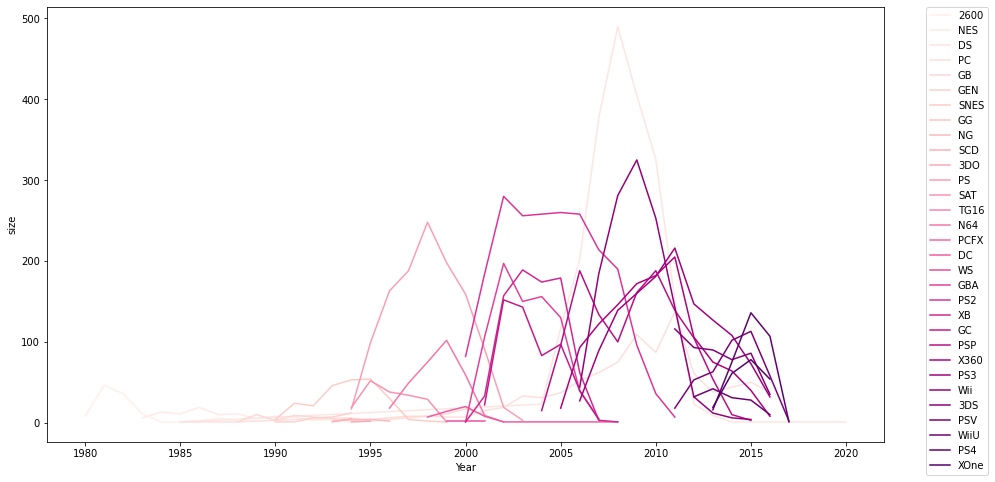

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.lineplot(
    data = df__platform, 
    x = 'Year',
    y = 'size', 
    hue = 'Platform',
    palette = 'RdPu'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


>'2600', 'PS' 나아가 'PS2'와 같은 게임 Platform은 사장된 반면, 'XOne', 'PS4'와 같은 Platform의 등장을 확인할 수 있음

#### 2-2. Year에 따른 Publisher 변화

In [ ]:
df__publisher = df.groupby(['Year', 'Publisher'], as_index=False).size()
df__publisher

,Year,Publisher,size
0,1980.0,Activision,4
1,1980.0,Atari,4
2,1981.0,20th Century Fox Video Games,3
3,1981.0,Activision,6
4,1981.0,Atari,11
...,...,...,...
2315,2016.0,Yeti,1
2316,2016.0,dramatic create,2
2317,2017.0,Idea Factory,1
2318,2017.0,Sega,2


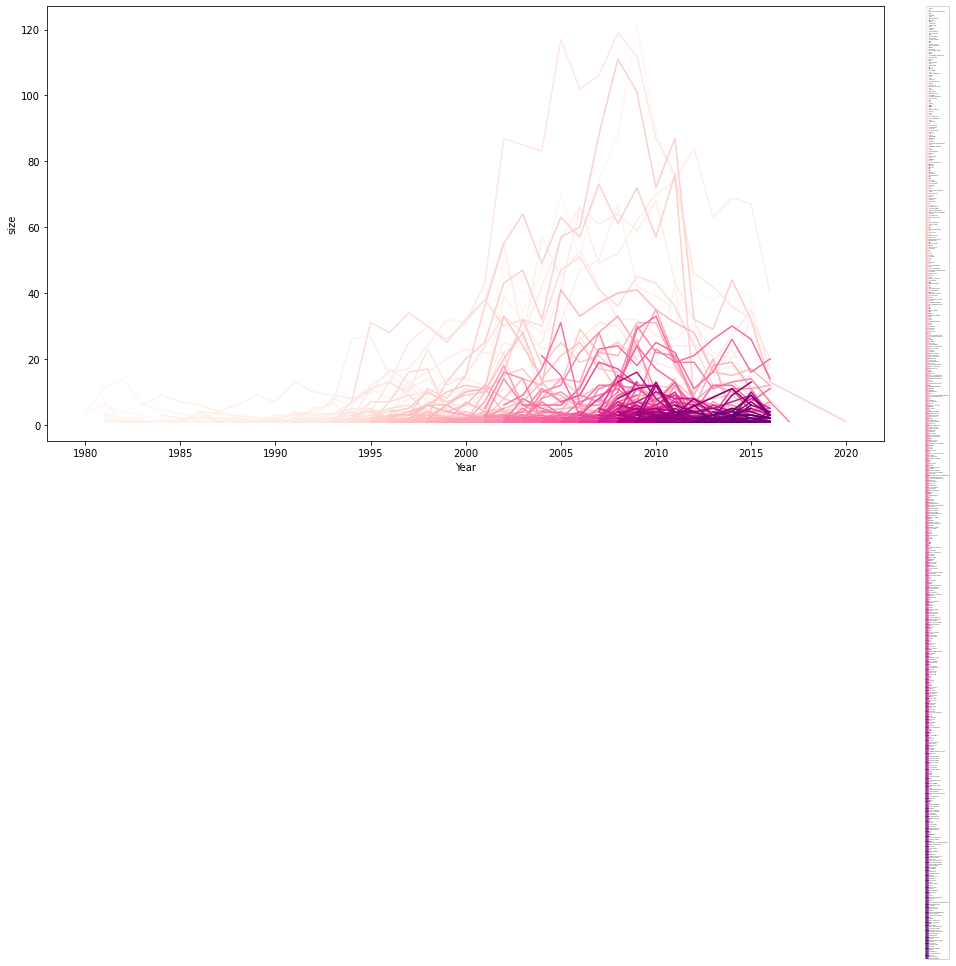

In [ ]:
# 표 사이즈 수정
plt.figure(figsize=(15, 8))

# 시각화
sns.lineplot(
    data = df__publisher, 
    x = 'Year',
    y = 'size', 
    hue = 'Publisher',
    palette = 'RdPu'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 0.5})
plt.show()


> 최근 년도로 갈수록 짙은 색이 눈에 띄는 것을 확인할 수 있음.  
> 이는, 이전에 존재해왔던 기업들은 사라지고 새로운 기업들이 다수 생겨남을 의미함.

#### 2-3. Year에 따른 Genre 변화

In [ ]:
# Genre별 발매량
df__genre = df.groupby(['Year', 'Genre'], as_index=False).size()
df__genre

,Year,Genre,size
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1981.0,Action,25
...,...,...,...
383,2016.0,Sports,38
384,2016.0,Strategy,10
385,2017.0,Action,1
386,2017.0,Role-Playing,2


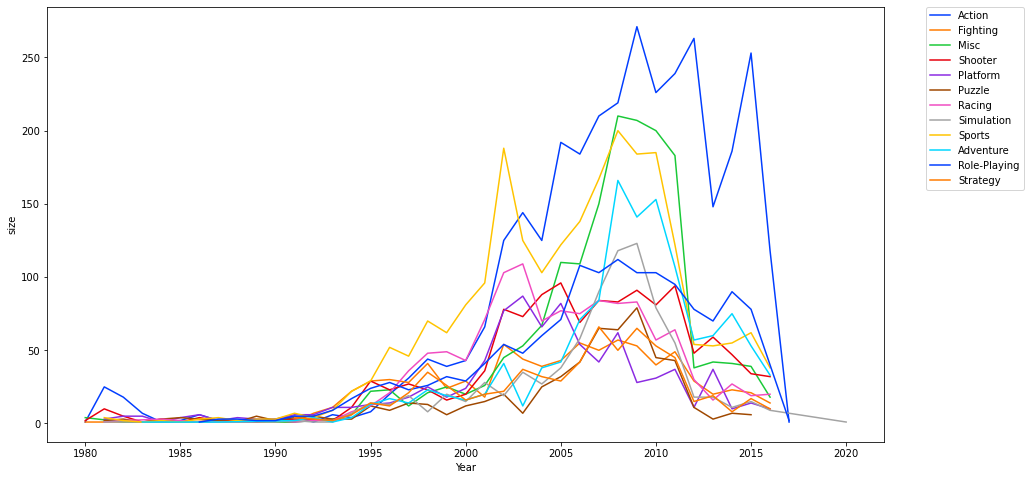

In [ ]:
# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.lineplot(
    data = df__genre, 
    x = 'Year',
    y = 'size', 
    hue = 'Genre',
    palette = 'bright'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


> 게임 발매량 기준으로 Genre 변화를 확인해 본 결과, Action이 가장 높은 발매량을 기록

#### 2-4. 결론
최근 년도에 가까울수록 새로운 Platform/Publisher의 등장과 이전 Platform/Publisher의 사장을 확인할 수 있음.  
따라서 데이터의 모든 년도를 다루기 보다는, **최근 15년 간의 데이터를 다룸으로써 최신의 Platform 및 Publisher 경향을 확인하는 것이 합리적으로 보임**

In [ ]:
# 2005 ~ 2020년도 데이터
is_df_15 = df['Year'] >= 2005
dff = df[is_df_15]

# Year기준 오름차순 정렬
dff = dff.sort_values(by=['Total'], axis=0, ascending=False)

# 최근 15년간 데이터 확인
dff.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
11137,Nintendogs,DS,2005.0,Simulation,Nintendo,9070000.0,11000000.0,1930000.0,2750000.0,24750000.0
10650,Mario Kart DS,DS,2005.0,Racing,Nintendo,9810000.0,7570000.0,4130000.0,1920000.0,23430000.0
3435,Wii Fit,Wii,2007.0,Sports,Nintendo,8940000.0,8030000.0,3600000.0,2150000.0,22720000.0
10899,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9090000.0,8590000.0,2530000.0,1790000.0,22000000.0


### **Step 3. 지역에 따른 Genre트렌드**
지역을 기준으로 Genre별 출고량의 평균 순위를 매겼을 때, 공통적으로 상위에 있는 Genre를 선별하는 것이 목표.  
Then, Genre의 중요 순위 확인 가능

#### 3-1 데이터 정규화


In [ ]:
# 출고량 데이터 추출
dff_data = dff.sort_values(by=['Year'], axis=0)
dff_data = dff_data.reset_index(drop=True)

dff_dataset = dff_data.iloc[:, 5:]
dff_dataset

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,100000.0,0.0,0.0,10000.0,110000.0
1,100000.0,40000.0,0.0,0.0,140000.0
2,110000.0,30000.0,0.0,0.0,140000.0
3,100000.0,40000.0,0.0,0.0,140000.0
4,70000.0,50000.0,0.0,20000.0,140000.0
...,...,...,...,...,...
11100,0.0,0.0,40000.0,0.0,40000.0
11101,0.0,0.0,10000.0,0.0,10000.0
11102,0.0,0.0,30000.0,0.0,30000.0
11103,0.0,0.0,10000.0,0.0,10000.0


In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler

dff_dataset1 = StandardScaler().fit_transform(dff_dataset)
dff_dataset1 = pd.DataFrame(dff_dataset1)
dff_dataset1

,0,1,2,3,4
0,-0.178408,-0.262366,-0.217511,-0.237344,-0.242273
1,-0.178408,-0.190218,-0.217511,-0.291849,-0.223023
2,-0.165155,-0.208255,-0.217511,-0.291849,-0.223023
3,-0.178408,-0.190218,-0.217511,-0.291849,-0.223023
4,-0.218166,-0.172181,-0.217511,-0.182839,-0.223023
...,...,...,...,...,...
11100,-0.310935,-0.262366,-0.056168,-0.291849,-0.287192
11101,-0.310935,-0.262366,-0.177175,-0.291849,-0.306443
11102,-0.310935,-0.262366,-0.096504,-0.291849,-0.293609
11103,-0.310935,-0.262366,-0.177175,-0.291849,-0.306443


In [ ]:
# 정규화된 데이터로 교체
dff_data['NA_Sales'] = dff_dataset1[0]
dff_data['EU_Sales'] = dff_dataset1[1]
dff_data['JP_Sales'] = dff_dataset1[2]
dff_data['Other_Sales'] = dff_dataset1[3]
dff_data['Total'] = dff_dataset1[4]
dff_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,ATV: Quad Frenzy,DS,2005.0,Racing,Majesco Entertainment,-0.178408,-0.262366,-0.217511,-0.237344,-0.242273
1,Paperboy / Rampage,GBA,2005.0,Misc,Zoo Digital Publishing,-0.178408,-0.190218,-0.217511,-0.291849,-0.223023
2,Batman Begins,GC,2005.0,Action,Electronic Arts,-0.165155,-0.208255,-0.217511,-0.291849,-0.223023
3,Tim Burton's The Nightmare Before Christmas: T...,GBA,2005.0,Platform,Disney Interactive Studios,-0.178408,-0.190218,-0.217511,-0.291849,-0.223023
4,Ys: The Ark of Napishtim,PS2,2005.0,Role-Playing,Konami Digital Entertainment,-0.218166,-0.172181,-0.217511,-0.182839,-0.223023
...,...,...,...,...,...,...,...,...,...,...
11100,Nobunaga's Ambition: Sphere of Influence - Sen...,PS4,2016.0,Misc,Tecmo Koei,-0.310935,-0.262366,-0.056168,-0.291849,-0.287192
11101,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,-0.310935,-0.262366,-0.177175,-0.291849,-0.306443
11102,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,-0.310935,-0.262366,-0.096504,-0.291849,-0.293609
11103,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,-0.310935,-0.262366,-0.177175,-0.291849,-0.306443


In [ ]:
# 장르별 출고량 평균 데이터
dff_data_mean = dff_data.groupby(['Year', 'Genre'], as_index=False).mean()
dff_data_mean

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,2005.0,Action,0.031565,-0.056163,-0.084739,-0.075248,-0.027037
1,2005.0,Adventure,-0.150009,-0.174329,-0.146443,-0.208794,-0.182534
2,2005.0,Fighting,0.007439,-0.074866,0.070467,-0.062420,-0.019172
3,2005.0,Misc,-0.000460,0.064594,0.074372,0.006443,0.035348
4,2005.0,Platform,-0.067537,-0.144246,-0.168321,-0.200121,-0.134359
...,...,...,...,...,...,...,...
141,2016.0,Sports,-0.151554,0.086980,-0.134717,-0.016455,-0.065807
142,2016.0,Strategy,-0.296357,-0.204648,-0.197343,-0.270047,-0.279492
143,2017.0,Action,-0.310935,-0.262366,-0.177175,-0.291849,-0.306443
144,2017.0,Role-Playing,-0.310935,-0.262366,-0.136839,-0.291849,-0.300026


In [ ]:
# 장르별 평균 출고량 합계
dff_data_sum = dff_data_mean.groupby(['Genre'], as_index=False).sum()
del dff_data_sum['Year']
dff_data_sum

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Action,-0.414232,-0.158570,-0.724269,-0.078503,-0.381452
1,Adventure,-2.746901,-2.313795,-1.196227,-2.666221,-2.657433
2,Fighting,-0.312515,-0.886647,0.849426,-0.133582,-0.347354
3,Misc,-0.277719,-0.334077,0.376824,-0.534407,-0.256294
4,Platform,2.256461,2.226269,2.682338,1.699342,2.511416
5,Puzzle,-1.960545,-1.228457,0.438912,-2.011342,-1.553315
6,Racing,-0.150294,1.615136,-1.344549,1.075327,0.414540
7,Role-Playing,-1.169741,-1.191036,4.901055,-1.330764,-0.367088
8,Shooter,4.272744,4.120013,-1.235513,4.222936,3.835253
9,Simulation,-0.871248,0.129227,1.263018,-1.055844,-0.299256


#### 3-2. 북미 게임장르 트렌드

In [ ]:
# 게임 장르별 총 출고량 순위
dff_data_sum_na = dff_data_sum[['Genre', 'NA_Sales']]
dff_data_sum_na = dff_data_sum_na.sort_values(by=['NA_Sales'], axis=0, ascending=False)
dff_data_sum_na = dff_data_sum_na.reset_index(drop=True)
dff_data_sum_na

,Genre,NA_Sales
0,Shooter,4.272744
1,Platform,2.256461
2,Sports,1.135620
3,Racing,-0.150294
4,Misc,-0.277719
5,Fighting,-0.312515
6,Action,-0.414232
7,Simulation,-0.871248
8,Role-Playing,-1.169741
9,Puzzle,-1.960545


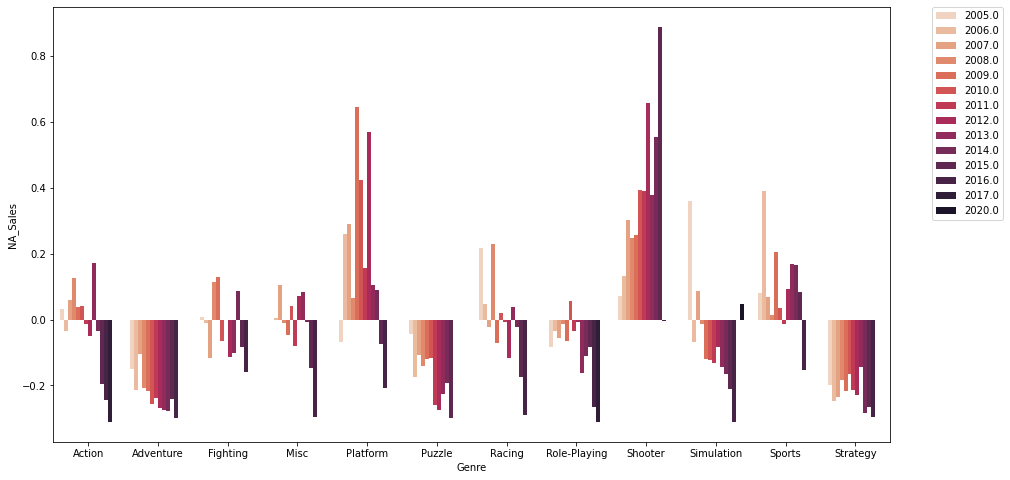

In [ ]:
# 북미 게임 장르 트렌드 시각화

# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_mean, 
    x = 'Genre',
    y = 'NA_Sales', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


> 근 10년동안 Shooter, Platform, Sports 순서대로 가장 높은 출고량을 기록  
> **2000년대 후반에는 Platform 장르** 역시 눈여겨 볼 만하지만, 2010년대 후반에는 Shooter 장르가 강세를 보임

#### 3-3. 유럽 게임장르 트렌드

In [ ]:
# 게임 장르별 총 출고량 순위
dff_data_sum_eu = dff_data_sum[['Genre', 'EU_Sales']]
dff_data_sum_eu = dff_data_sum_eu.sort_values(by=['EU_Sales'], axis=0, ascending=False)
dff_data_sum_eu = dff_data_sum_eu.reset_index(drop=True)
dff_data_sum_eu

,Genre,EU_Sales
0,Shooter,4.120013
1,Platform,2.226269
2,Racing,1.615136
3,Sports,1.364306
4,Simulation,0.129227
5,Action,-0.158570
6,Misc,-0.334077
7,Fighting,-0.886647
8,Role-Playing,-1.191036
9,Puzzle,-1.228457


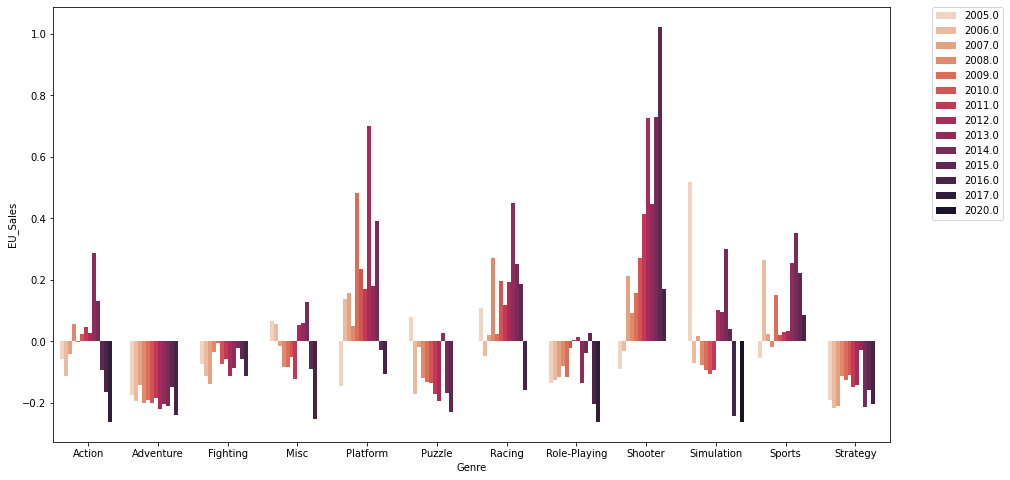

In [ ]:
# 유럽 게임 장르 트렌드 시각화

# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_mean, 
    x = 'Genre',
    y = 'EU_Sales', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


> **북미와 비슷한 양상**을 보임. 근 10년동안 Shooter 장르가 가장 높은 연평균 출고량을 기록  
> 2000년대 후반에는 Platform 장르 역시 인기 있었음을 확인할 수 있음

#### 3-4. 일본 게임장르 트렌드

In [ ]:
# 게임 장르별 총 출고량 순위
dff_data_sum_jp = dff_data_sum[['Genre', 'JP_Sales']]
dff_data_sum_jp = dff_data_sum_jp.sort_values(by=['JP_Sales'], axis=0, ascending=False)
dff_data_sum_jp = dff_data_sum_jp.reset_index(drop=True)
dff_data_sum_jp

,Genre,JP_Sales
0,Role-Playing,4.901055
1,Platform,2.682338
2,Simulation,1.263018
3,Fighting,0.849426
4,Puzzle,0.438912
5,Misc,0.376824
6,Action,-0.724269
7,Strategy,-0.811642
8,Sports,-0.881850
9,Adventure,-1.196227


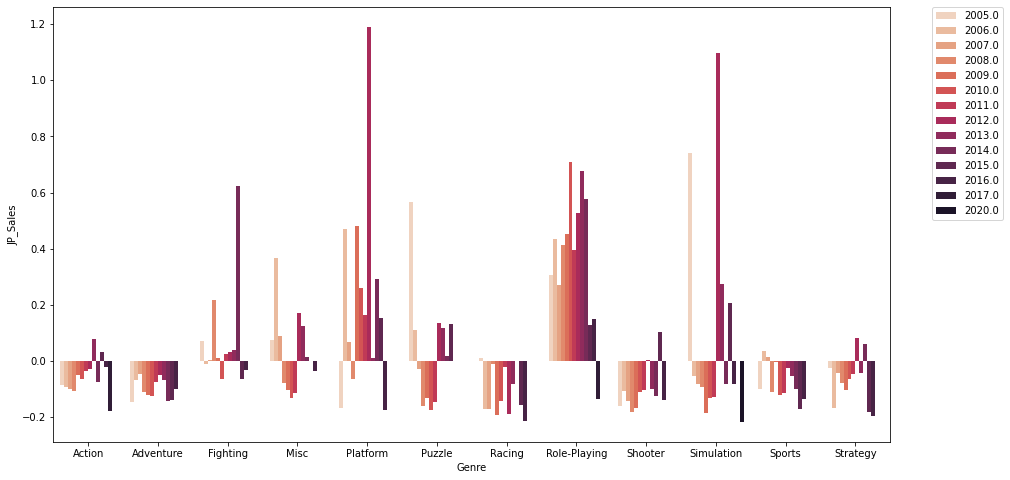

In [ ]:
# 일본 게임 장르 트렌드 시각화

# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_mean, 
    x = 'Genre',
    y = 'JP_Sales', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


> 북미/유럽과 상이하게, 일본에서는 **Role-Playing** 장르가 근 10년동안 높은 출고량을 기록하고 있음  
> 특히나 2012년에는 Simulation,Platform장르의 우세를 확인할 수 있음  
> 또한 두 지역에 비해 Shooter장르가 상대적으로 저조함  

#### 3-5. 기타 지역 게임장르 트렌드

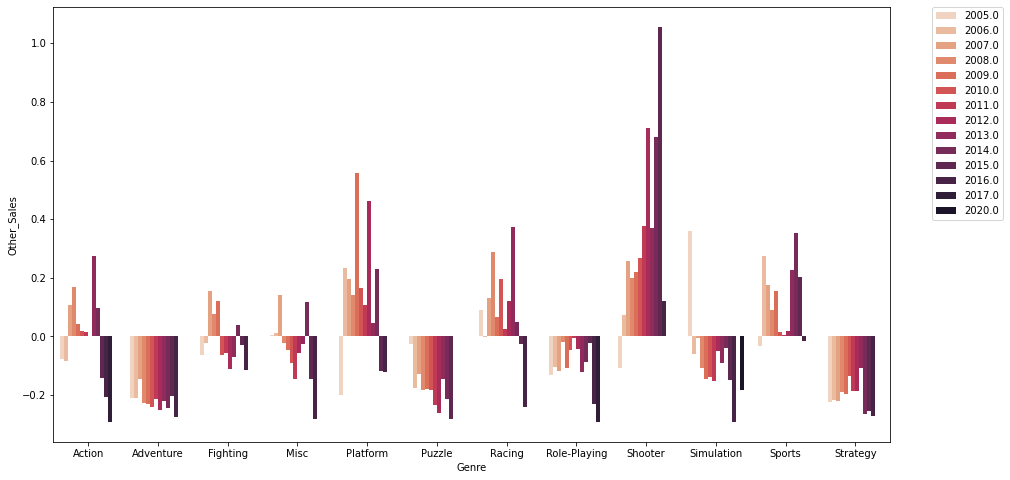

In [ ]:
# 기타 지역 게임 장르 트렌드 시각화

# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_mean, 
    x = 'Genre',
    y = 'Other_Sales', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


> 근 10년동안 Shooter 장르가 가장 높은 연평균 출고량을 기록  
> 2000년대 후반에는 Platform 장르가, 2010년대 후반에는 Shooter와 Sports가 인기 있었음을 확인할 수 있음

#### 3-6. 전 세계 게임장르 트렌드

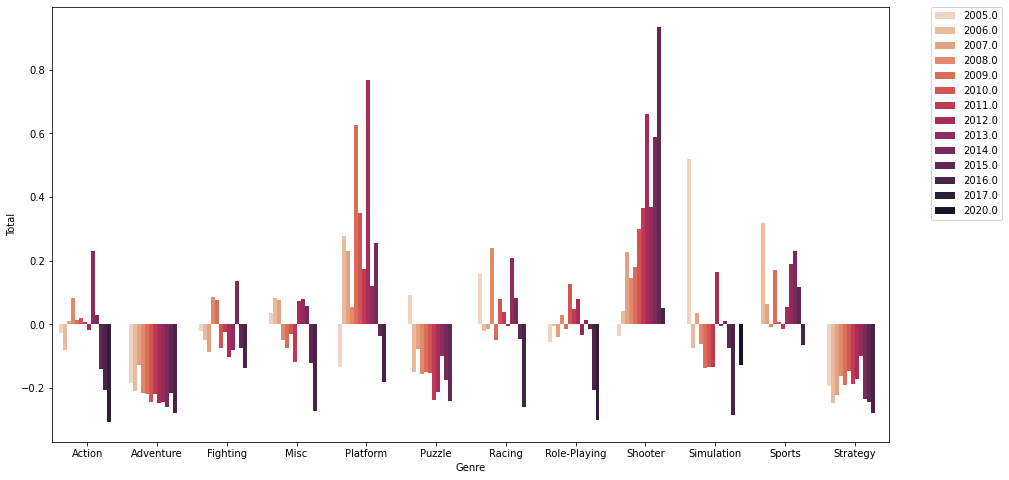

In [ ]:
# 전 세계 게임 장르 트렌드 시각화

# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_mean, 
    x = 'Genre',
    y = 'Total', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


> 근 10년동안 전 세계적으로는 Shooter 장르가 가장 높은 연평균 출고량을 기록  
> **2000년대 후반에는 Platform 장르**가, **2010년대 후반에는 Shooter와 Sports**가 인기 있었음을 확인할 수 있음

In [ ]:
# NA - EU
from scipy.stats import chi2_contingency
chi2_na_eu = dff_dataset[['NA_Sales', 'EU_Sales']]

chi2_na_eu

,NA_Sales,EU_Sales
0,100000.0,0.0
1,100000.0,40000.0
2,110000.0,30000.0
3,100000.0,40000.0
4,70000.0,50000.0
...,...,...
11100,0.0,0.0
11101,0.0,0.0
11102,0.0,0.0
11103,0.0,0.0


#### 3-7. 결론
*   **북미와 유럽은 트렌드를 공유하는 듯 보임**  
두 지역 모두 근 10년동안 Shooter 장르가 가장 높은 연평균 출고량을 기록  
2010년대 **초반에는 Platform 장르** 역시 눈여겨 볼 만하며, **후반에는 Shooter 장르**가 강세를 보임

*   **일본은 북미/유럽과 다른 트렌드**를 가지고 있음에 주목할 만함.  
일본의 문화적 요소가 작용하는 것으로 판단됨 

*   게임 발매량을 기준으로 Genre의 변화를 살펴봤을 때는 Action이 우위를 차지했지만, 전체 게임 출고량은 Shooter가 우위를 차지.  
다시 말해, **Action장르가 가장 많이 발매되었지만 전체적으로 많이 팔린 게임 장르는 Shooter**라는 것  

*   전 세계를 대상으로 발매 시, 2010년대 후반 출고량이 높은 Shooter/Sports를 고려하되, 
일본을 대상으로 발매 예정이라면 Role-Playing을 고려해 봄직함

### **Step 4. 출고량 중심의 게임 데이터 분석**

Year마다 평균치, 모수가 다르기 때문에 정규화를 통한 균일화 필요

In [ ]:
# 정규화 된 데이터 업로드
dff_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,ATV: Quad Frenzy,DS,2005.0,Racing,Majesco Entertainment,-0.178408,-0.262366,-0.217511,-0.237344,-0.242273
1,Paperboy / Rampage,GBA,2005.0,Misc,Zoo Digital Publishing,-0.178408,-0.190218,-0.217511,-0.291849,-0.223023
2,Batman Begins,GC,2005.0,Action,Electronic Arts,-0.165155,-0.208255,-0.217511,-0.291849,-0.223023
3,Tim Burton's The Nightmare Before Christmas: T...,GBA,2005.0,Platform,Disney Interactive Studios,-0.178408,-0.190218,-0.217511,-0.291849,-0.223023
4,Ys: The Ark of Napishtim,PS2,2005.0,Role-Playing,Konami Digital Entertainment,-0.218166,-0.172181,-0.217511,-0.182839,-0.223023
...,...,...,...,...,...,...,...,...,...,...
11100,Nobunaga's Ambition: Sphere of Influence - Sen...,PS4,2016.0,Misc,Tecmo Koei,-0.310935,-0.262366,-0.056168,-0.291849,-0.287192
11101,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,-0.310935,-0.262366,-0.177175,-0.291849,-0.306443
11102,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,-0.310935,-0.262366,-0.096504,-0.291849,-0.293609
11103,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,-0.310935,-0.262366,-0.177175,-0.291849,-0.306443


#### 4-1. 출고량 기준, Year에 따른 Platform 변화 

In [ ]:
# Platform별 출고량 평균 데이터
dff_data_pmean = dff_data.groupby(['Year', 'Platform'], as_index=False).mean()
dff_data_pmean

,Year,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,2005.0,DS,0.236505,0.386037,0.811908,0.215934,0.406445
1,2005.0,GBA,-0.100217,-0.152341,-0.116051,-0.268789,-0.152831
2,2005.0,GC,-0.047930,-0.166975,-0.110642,-0.254201,-0.130142
3,2005.0,PC,-0.261506,-0.132208,-0.217511,-0.240290,-0.236550
4,2005.0,PS2,0.125386,0.021091,0.015970,0.109602,0.083660
...,...,...,...,...,...,...,...
108,2016.0,X360,-0.251298,-0.172181,-0.217511,-0.244157,-0.246284
109,2016.0,XOne,-0.146749,-0.107716,-0.216764,-0.185867,-0.165745
110,2017.0,PS4,-0.310935,-0.262366,-0.096504,-0.291849,-0.293609
111,2017.0,PSV,-0.310935,-0.262366,-0.177175,-0.291849,-0.306443


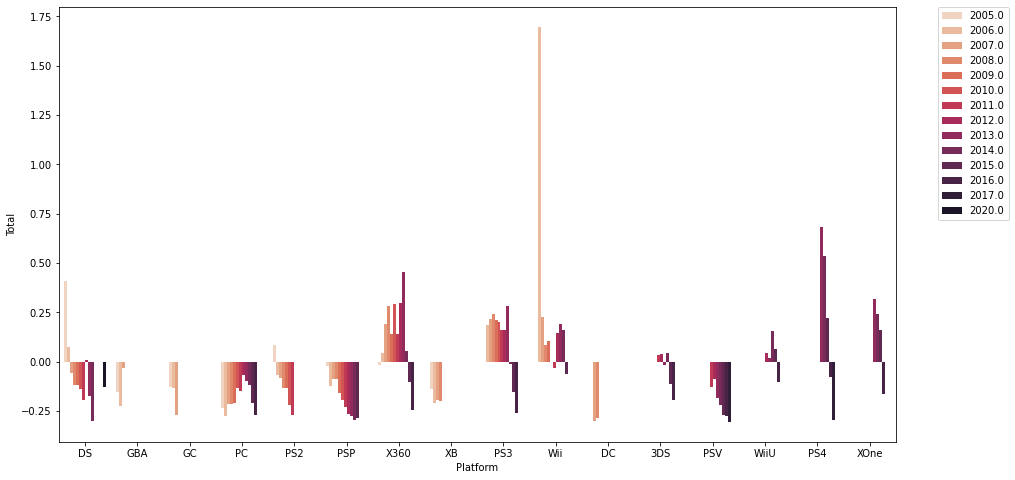

In [ ]:
# 전 세계 게임 플랫폼 트렌드 시각화

# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_pmean, 
    x = 'Platform',
    y = 'Total', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


> 근래 이용하는 플랫폼은 PSV, PS4, XOne으로 확인됨  
> 하지만 짙은 색 데이터 대부분이 음수인 것으로 보아, 최근 년도로 갈 수록 콘솔 게임 출고량이 적다는 것을 알 수 있음  
이는 **스마트폰의 사용 증가로 인한 콘솔 게임 유저 감소로 이해 가능**

##### Platform에 따른 국가별 출고량

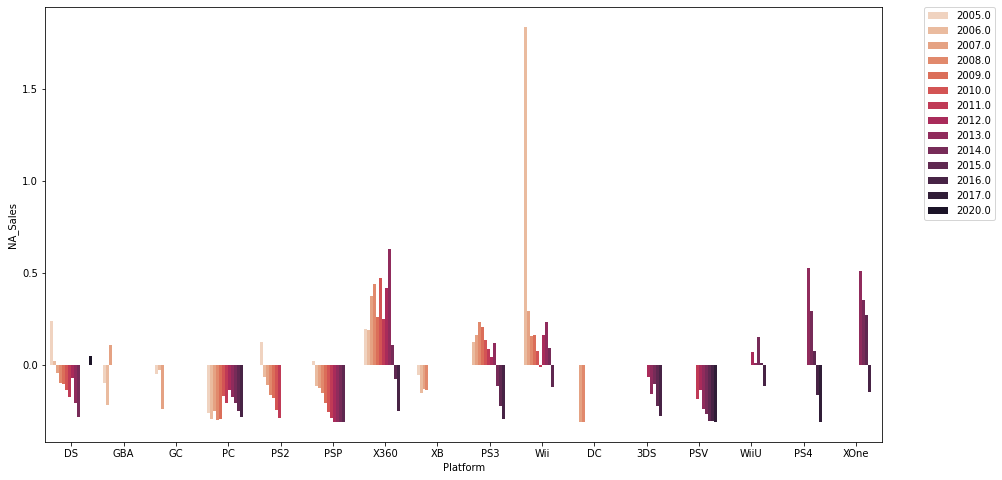

In [ ]:
# 북미
# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_pmean, 
    x = 'Platform',
    y = 'NA_Sales', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

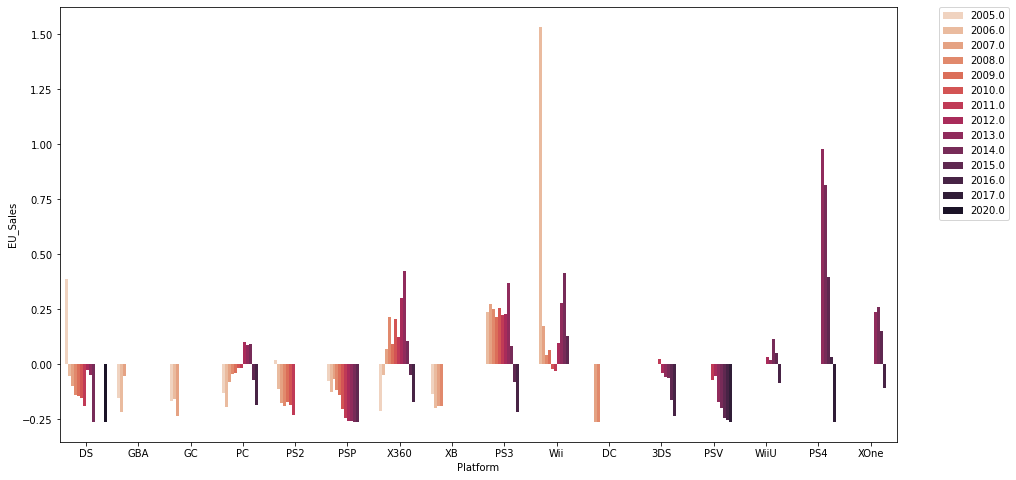

In [ ]:
# 유럽
# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_pmean, 
    x = 'Platform',
    y = 'EU_Sales', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

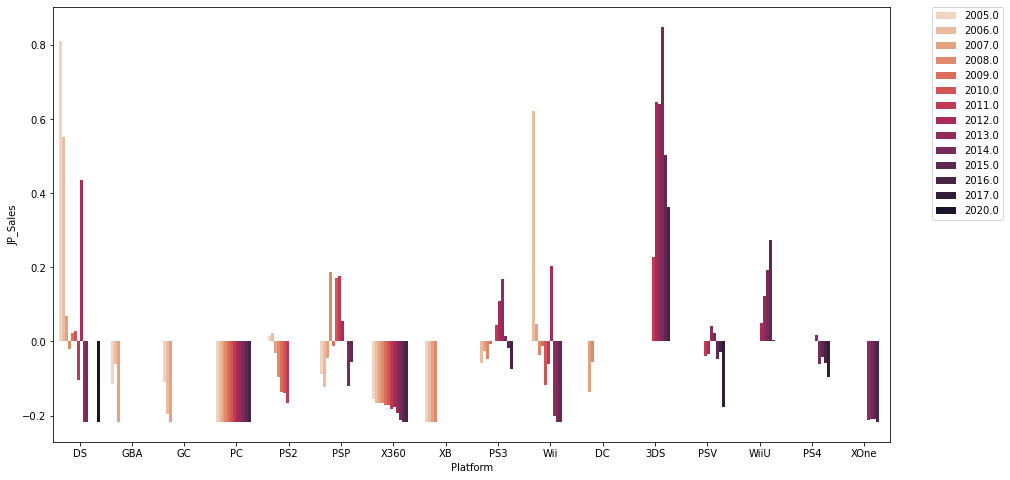

In [42]:
# 일본
# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_pmean, 
    x = 'Platform',
    y = 'JP_Sales', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

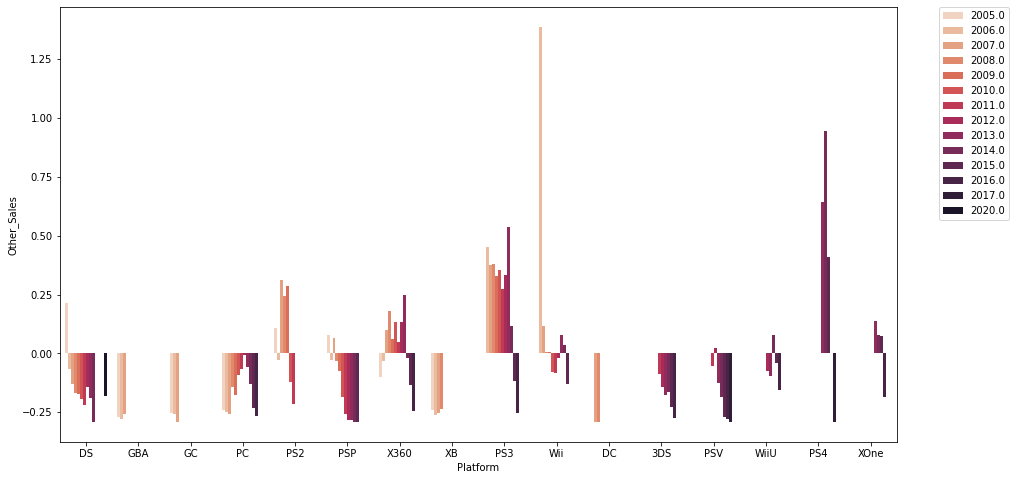

In [ ]:
# 기타 지역
# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_pmean, 
    x = 'Platform',
    y = 'Other_Sales', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

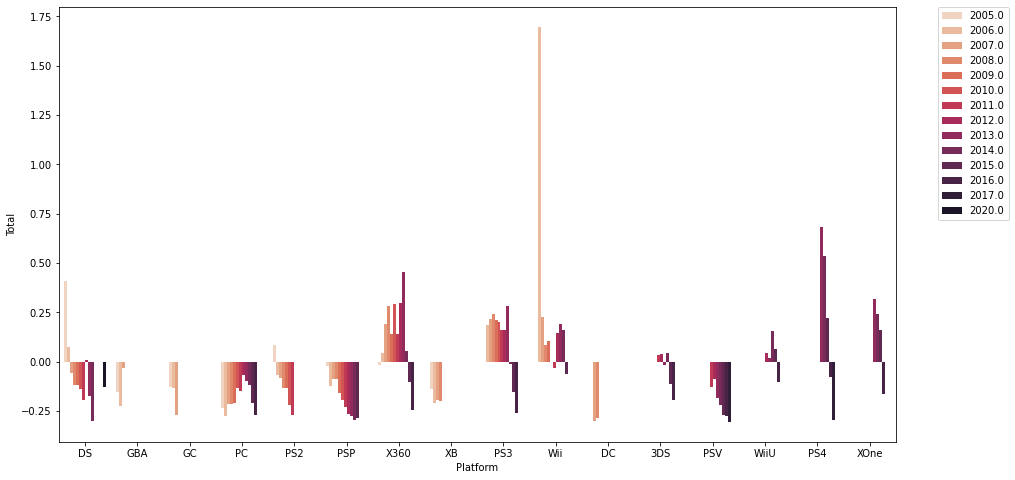

In [ ]:
# 전체 지역
# 표 사이즈 수정
plt.figure(figsize=(15,8))

# 시각화
sns.barplot(
    data = dff_data_pmean, 
    x = 'Platform',
    y = 'Total', 
    hue = 'Year',
    palette = 'rocket_r'
        )

# 범례 표 바깥에 위치
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 4-2. 출고량 높은 게임 데이터 분석

In [41]:
# 정규화된 데이터 Total 내림차순 정렬
total_top = dff_data.sort_values(by=['Total'], axis=0, ascending=False)
total_top.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
1804,Wii Sports,Wii,2006.0,Sports,Nintendo,54.674733,52.080702,14.988998,45.819476,52.781228
3385,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,20.694677,22.969154,15.069669,17.749343,22.679177
5777,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,20.562149,19.596255,13.012555,15.841664,20.863172
1930,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,14.770697,16.385688,26.000608,15.514634,18.944495
1937,Wii Play,Wii,2006.0,Misc,Nintendo,18.282676,16.331577,11.600811,15.242108,18.302797
5818,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,19.024830,12.471682,18.740206,12.026306,18.046118
840,Nintendogs,DS,2005.0,Simulation,Nintendo,11.709311,19.578218,7.567254,14.697057,15.569164
834,Mario Kart DS,DS,2005.0,Racing,Nintendo,12.690014,13.391563,16.441079,10.173133,14.722123
2971,Wii Fit,Wii,2007.0,Sports,Nintendo,11.537025,14.221261,14.303294,11.426750,14.266517
5766,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,11.735816,15.231327,9.987388,9.464566,13.804495



> 출고량 높은 게임 상위 10개는 모두 **닌텐도회사의 Will플랫폼을 이용하며 Shooter장르가 없음**  
> 하지만 전 세계적으로 출고량이 가장 많았던 장르는 Shooter. 상이한 결과가 나옴
>
> 이는 일본의 시장규모에 비해 미국/EU의 시장규모가 더 크고, 특정 게임 몇몇의 출고량보다 Shooter장르의 전체 출고량이 더 크다는 것을 알 수 있음

### **Step 5. 총 결론**

1. 전 세계적으로 Action의 발매량이 높지만, 정작 많이 팔린건 Shooter

2. 북미/유럽은 Shooter 장르가 우위를 점하며 트렌드를 공유하는듯 보임.  
하지만 일본은 롤플레잉/시뮬레이션 장르를 선호. 일본의 문화적 요소(마니아 문화)가 작용하는 듯

3. 최근 이용하는 플랫폼은 PSV, PS4, XOne.  
그런데 과거에 비해 출고량이 감소하는 것으로 보아, 다수의 유저들이 스마트폰 게임/온라인 PC 게임 유통 플랫폼으로 빠지는 듯  
최근 주목받고 있는 온라인 PC 게임 유통 플랫폼(스팀, 에픽 게임즈)과 크로스 플랫폼에 관심을 가질 필요가 있음



>  
- **전 세계를 대상으로 게임 발매 시 : 스팀을 통한 데모 버전을 출시해 이목을 끈 다음, 크로스 플랫폼에 슈팅 장르를 기획**  
- **일본을 대상으로 게임 발매 시 : 롤플레이 장르를 3DS 혹은 스팀 플랫폼에 출시하는 방향으로 기획**
